In [1]:
import sys
import os
import pandas as pd
import numpy as np
from importlib import reload

# plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable

# local import
sys.path.append("../")
from utils.trackmate import dataEngineering as _tm
from utils.visualization import generalPlots as _gplot
from utils.visualization import vectorPlots as _vplot
from utils.trackmate import spatialAnalysis as _stat

/home/cstansbu/.local/lib/python3.8/site-packages/libpysal/weights/util.py:23: UserWarning: geopandas not available. Some functionality will be disabled.
  warn("geopandas not available. Some functionality will be disabled.")


In [2]:
"""Load Data
"""

path = "/nfs/turbo/umms-indikar/shared/projects/live_cell_imaging/2021-05-12-BJ-PF-H2B-4OHT-AfterSort/analysis_files/CLEANED_TRACKS.csv"

df = pd.read_csv(path)
print(df.shape)
df.head()

(3803486, 71)


,LABEL,ID,TRACK_ID,QUALITY,POSITION_X,POSITION_Y,POSITION_Z,POSITION_T,FRAME,RADIUS,...,STEP,NORMED_STEP,MEAN_GREEN_INTENSITY_SCALED,MEAN_BLUE_INTENSITY_SCALED,MEAN_RED_INTENSITY_SCALED,MEAN_OBLIQUE_INTENSITY_SCALED,MEAN_INTENSITY_SCALED,SCENE,MyoD,SERUM
0,ID23463,23463,C4_0,2.349,429.497,1836.179,0,0.000,0,10,...,0,0.000000,0.000000,0.0,0.0,0.838258,0.0,C4,+,HS
1,ID8192,8192,C4_0,2.895,432.123,1832.823,0,1337.248,1,10,...,1,0.000047,0.000000,0.0,0.0,0.588313,0.0,C4,+,HS
2,ID13445,13445,C4_0,2.326,431.302,1827.591,0,2674.496,2,10,...,2,0.000093,0.000000,0.0,0.0,0.000000,0.0,C4,+,HS
3,ID3542,3542,C4_0,2.646,432.208,1824.476,0,4011.744,3,10,...,3,0.000140,0.714933,0.0,1.0,0.742561,0.0,C4,+,HS
4,ID17874,17874,C4_0,2.345,434.819,1822.808,0,5348.992,4,10,...,4,0.000187,0.756790,0.0,0.0,0.722367,0.0,C4,+,HS


In [29]:
df.columns

Index(['LABEL', 'ID', 'TRACK_ID', 'QUALITY', 'POSITION_X', 'POSITION_Y',
       'POSITION_Z', 'POSITION_T', 'FRAME', 'RADIUS', 'VISIBILITY',
       'MEAN_GREEN_INTENSITY', 'MEAN_BLUE_INTENSITY', 'MEAN_RED_INTENSITY',
       'MEAN_OBLIQUE_INTENSITY', 'MANUAL_COLOR', 'MEAN_INTENSITY',
       'MEDIAN_INTENSITY', 'MIN_INTENSITY', 'MAX_INTENSITY', 'TOTAL_INTENSITY',
       'STANDARD_DEVIATION', 'ESTIMATED_DIAMETER', 'CONTRAST', 'SNR',
       'MEAN_GREEN_TRACK_INTENSITY', 'MEAN_BLUE_TRACK_INTENSITY',
       'MEAN_RED_TRACK_INTENSITY', 'MEAN_OBLIQUE_TRACK_INTENSITY',
       'NUMBER_SPOTS', 'NUMBER_GAPS', 'LONGEST_GAP', 'NUMBER_SPLITS',
       'NUMBER_MERGES', 'NUMBER_COMPLEX', 'TRACK_DURATION', 'TRACK_START',
       'TRACK_STOP', 'TRACK_DISPLACEMENT', 'TRACK_INDEX', 'TRACK_X_LOCATION',
       'TRACK_Y_LOCATION', 'TRACK_Z_LOCATION', 'TRACK_MEAN_SPEED',
       'TRACK_MAX_SPEED', 'TRACK_MIN_SPEED', 'TRACK_MEDIAN_SPEED',
       'TRACK_STD_SPEED', 'TRACK_MEAN_QUALITY', 'TRACK_MAX_QUALITY',
       

In [32]:


df['MANUAL_COLOR'].value_counts()

-10921639    3803486
Name: MANUAL_COLOR, dtype: int64

<ipython-input-66-707e8bcbf623>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['MEAN_RED_INTENSITY'] = test['MEAN_RED_INTENSITY'] * test['SNR']
<ipython-input-66-707e8bcbf623>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['MEAN_GREEN_INTENSITY'] = test['MEAN_GREEN_INTENSITY'] * test['SNR']


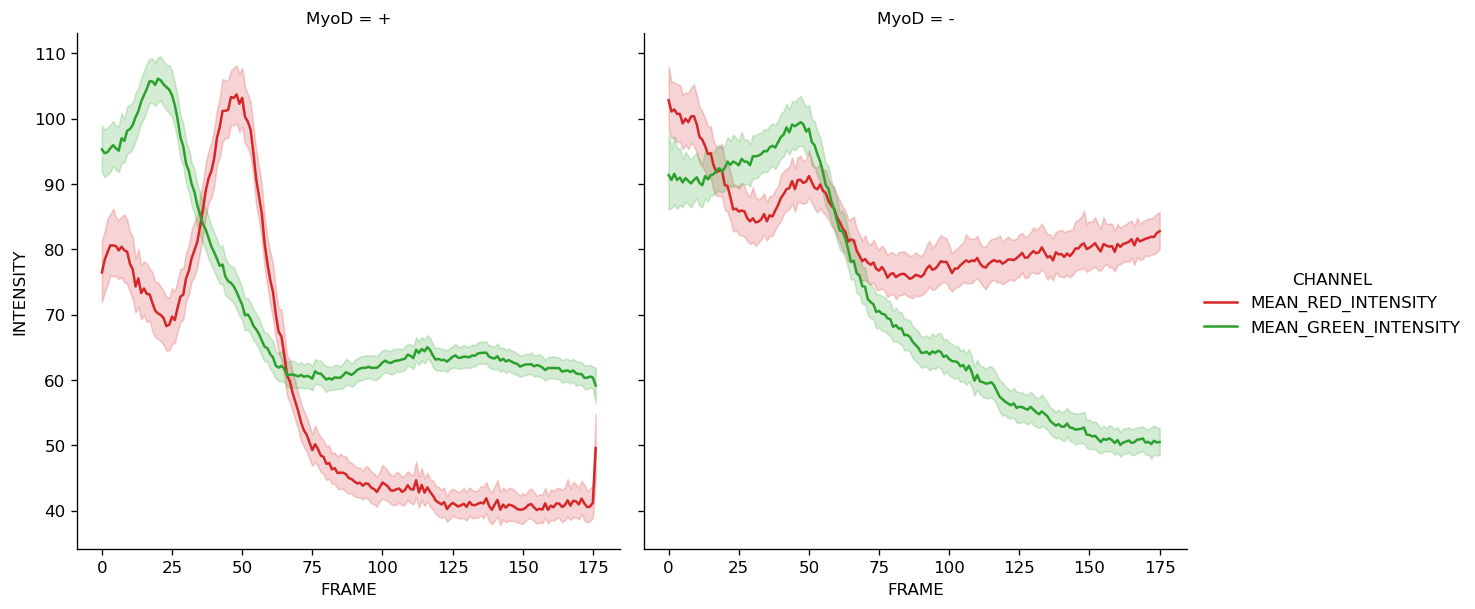

In [66]:
matplotlib.rcParams['figure.dpi'] = 120
matplotlib.rcParams['figure.figsize'] = (10, 6)


test = df[['FRAME', 'MyoD', 'MEAN_RED_INTENSITY', 'MEAN_GREEN_INTENSITY', 'SNR']]

test['MEAN_RED_INTENSITY'] = test['MEAN_RED_INTENSITY'] * test['SNR']
test['MEAN_GREEN_INTENSITY'] = test['MEAN_GREEN_INTENSITY'] * test['SNR']

test = pd.melt(test, 
               id_vars=['FRAME', 'MyoD'], 
               value_vars=['MEAN_RED_INTENSITY', 'MEAN_GREEN_INTENSITY'],
               var_name='CHANNEL',
               value_name='INTENSITY')


sns.relplot(data=test,
             x='FRAME',
             y='INTENSITY',
             hue='CHANNEL',
             col='MyoD',
             kind="line",
             palette=['C3', 'C2'])

# sns.relplot(data=test,
#              x='FRAME',
#              y='MEAN_RED_INTENSITY',
#              col='MyoD',
#              kind="line",
#              color='C3',
#              label='Mean Red Intensity')


# plt.ylabel("Mean Blob Intensity")
# plt.xlabel("Frame")
# plt.suptitle("Mean PIP FUCCI Signals Over Time")

In [ ]:
"""Add PF ratio:
    Normalize across a given frame (space), then normalize across a track (time)
"""

In [17]:

t0 = df[df['FRAME'] == 0]

FEATURES = [
    'POSITION_X',
    'POSITION_Y',
    'MEAN_GREEN_INTENSITY',
    'MEAN_BLUE_INTENSITY',
    'MEAN_RED_INTENSITY',
    'MANUAL_COLOR',
    'MEAN_INTENSITY',
    'MEDIAN_INTENSITY',
    'MIN_INTENSITY',
    'MAX_INTENSITY',
    'TOTAL_INTENSITY',
    'STANDARD_DEVIATION',
    'ESTIMATED_DIAMETER',
    'CONTRAST',
    'SNR',
    'SNR',
    'MEAN_GREEN_TRACK_INTENSITY',
    'MEAN_BLUE_TRACK_INTENSITY',
    'MEAN_RED_TRACK_INTENSITY',
    'TOTAL_DISTANCE_TRAVELED',
    'STEP'
]

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(t0[FEATURES])
X_reduced = PCA(n_components=2).fit_transform(X_scaled)
results = pd.DataFrame(X_reduced)



results.head()

# sns.scatterplot(data)

,0,1
0,-3.067574,-0.662515
1,-2.254739,-0.048005
2,3.466462,1.420010
3,0.492543,-0.759195
4,1.867035,0.398232
